In [ ]:
'''
This script processes text data from articles to analyze keyword frequency and generate word clouds by neighborhood.
'''

In [1]:
# Importing necessary libraries 

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from collections import Counter

In [2]:
# Examining full dataset without truncation 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [2]:
# Loading dataset that includes the 'body_cleaned' column 
df2 = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/notebooks/Rachel/final_combined3.csv')

In [8]:
# Displaying new dataframe
df2.head()

,hl1_x,body,position_section,position_subsection,author,year,body_cleaned,longitude,latitude,Tracts,...,Article_Count,T_majority_race,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race,tokens
0,cerezyme alternative gets fda approval,washington the food and drug administration ha...,BUSINESS,unknown,Associated Press,2010.0,washington food drug administration approved n...,-71.118563,42.362780,803.0,...,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,"[approve, drug, patient, gaucher, disease, enz..."
1,taking her own advice,while mckelle harbored big time ambitions her ...,G,Living Arts,unknown,2010.0,"mckelle harbored big- time ambitions , numerou...",-71.118116,42.360262,803.0,...,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,"[harbor, ambition, numerous, pursuit, prevent,..."
2,terriers are triple threats vs. albany,as result shooting percentages tend to suffer ...,SPORTS,unknown,unknown,2010.0,"result , shooting percentages tend suffer terr...",-71.117705,42.352197,803.0,...,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,"[result, shoot, percentage, tend, suffer, terr..."
3,10 are hurt as van overturns on mass. pike,marie eveillard 53 of brockton was taken by me...,NEWS,Metro,unknown,2010.0,"marie eveillard , 53 , brockton , taken medfli...",-71.119302,42.356444,803.0,...,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,"[take, medflight, umass, memorial, medical, ce..."
4,sanofi presses genzymeover takeover bid,in letter released yesterday sanofi aventis re...,BUSINESS,unknown,unknown,2010.0,"letter released yesterday , sanofi aventis rei...",-71.118563,42.362780,803.0,...,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,"[letter, release, yesterday, reiterate, genzym..."


In [3]:
# Ensuring the 'body_cleaned' column is a string
df2['body_cleaned'] = df2['body_cleaned'].astype(str)

In [4]:
# Loading spaCy model
nlp = spacy.load('en_core_web_sm')

In [5]:
# Defining additional stop words
additional_stop_words = set([
    "state", "school", "come", "think", "new", "reach", "include", "p", "m", "know", "day", "want", "m p", "M", "P", "take", "company" 
])

In [7]:
# Defining the preprocessing function with additional stop words
def preprocess_text(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space 
        and token.lemma_.lower() not in additional_stop_words
    ]
    return tokens

# Applying function to body
df2['tokens'] = df2['body_cleaned'].apply(preprocess_text)


In [8]:
# Geting the 15 most frequent words for each neighborhood
def get_most_frequent_words(tokens_list, num_words=15):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens).most_common(num_words)


In [9]:
# To get a list of unique neighborhoods from the dataframe
neighborhoods = df2['Neighborhood'].unique()

# Creating dictionary where the key is the neighborhood and the value is a list of the most frequent words in that neighborhood
frequent_words = {neighborhood: get_most_frequent_words(df2[df2['Neighborhood'] == neighborhood]['tokens']) for neighborhood in neighborhoods}

In [10]:
# Preparing data for the DataFrame
data = {'Neighborhood': [], 'Word': [], 'Frequency': []}

In [11]:
# Looping through each neighborhood and its corresponding words and frequencies
for neighborhood, words in frequent_words.items():
    for word, freq in words:
        data['Neighborhood'].append(neighborhood)
        data['Word'].append(word)
        data['Frequency'].append(freq)

In [12]:
# Creating DataFrame
df_frequent_words = pd.DataFrame(data)

In [13]:
df_frequent_words

,Neighborhood,Word,Frequency
0,Allston,say,1105
1,Allston,year,417
2,Allston,boston,410
3,Allston,$,377
4,Allston,play,285
5,Allston,2,265
6,Allston,1,240
7,Allston,com,232
8,Allston,time,229
9,Allston,game,224


In [11]:
# Defining the preprocessing function with additional stop words  
def preprocess_text(text):
    doc = nlp(text)
    # Include additional stop words if needed
    additional_stop_words = set(["say", "said", "people", "one", "would", "could", "also", "like", "get", "go", "see", "make", 
                                 "time", "well", "even", "year", "way", "use", "many", "much", "state", "school", "come", "think", 
                                 "new", "reach", "include", "p", "m", "know", "day", "want", "MP", "m p", "c", "M", "P"])
    tokens = [
        token.lemma_.lower() for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space and token.lemma_.lower() not in additional_stop_words
        and token.pos_ in ["NOUN", "VERB", "ADJ", "ADV"]
    ]
    return tokens

# Applying the preprocessing function to the 'body_cleaned' column
df2['tokens'] = df2['body_cleaned'].apply(preprocess_text)

In [9]:
# Function to get the most frequent meaningful words
def get_most_frequent_words(tokens_list, num_words=10):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens).most_common(num_words)

# To get the most frequent meaningful words for each neighborhood and create a keyword column
def create_keyword_column(df):
    neighborhoods = df['Neighborhood'].unique()
    keywords = {}
    for neighborhood in neighborhoods:
        neighborhood_tokens = df[df['Neighborhood'] == neighborhood]['tokens']
        frequent_words = get_most_frequent_words(neighborhood_tokens, num_words=10)
        keywords[neighborhood] = ' '.join([word for word, _ in frequent_words])
    df['Keywords'] = df['Neighborhood'].map(keywords)
    return df

# Applying the function to create the keyword column
df2 = create_keyword_column(df2)

# Displaying the DataFrame with the new keyword column
print(df2[['Neighborhood', 'Keywords']].head())

  Neighborhood                                           Keywords
0      Allston  play company game work com point good team tak...
1      Allston  play company game work com point good team tak...
2      Allston  play company game work com point good team tak...
3      Allston  play company game work com point good team tak...
4      Allston  play company game work com point good team tak...


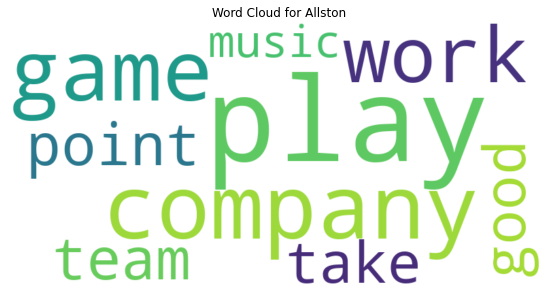

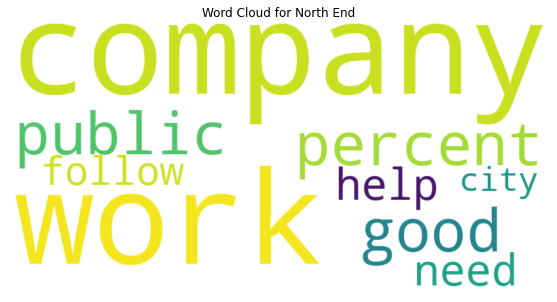

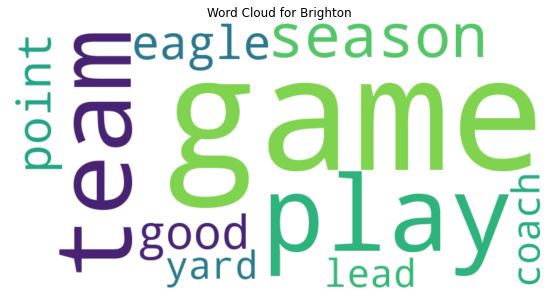

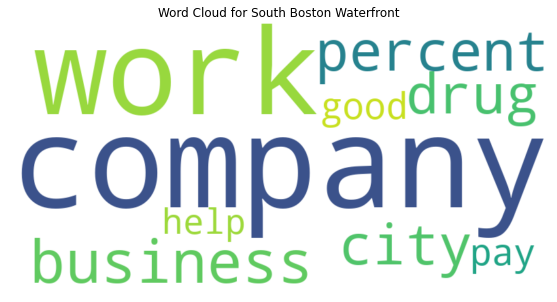

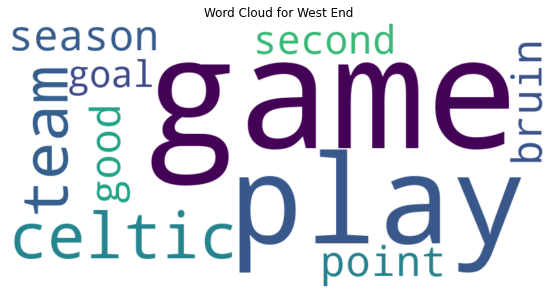

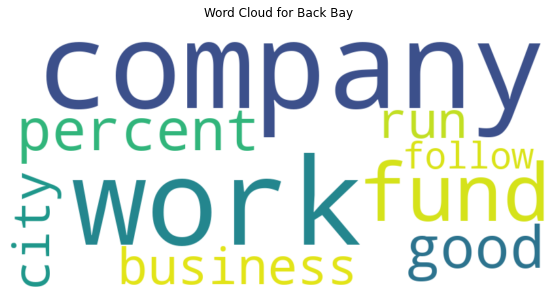

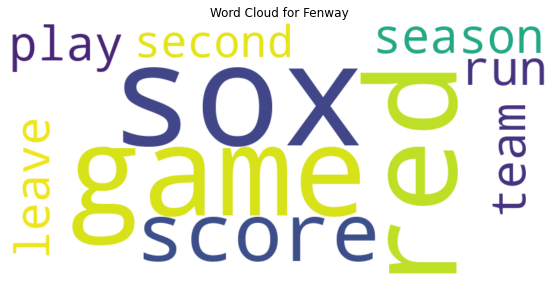

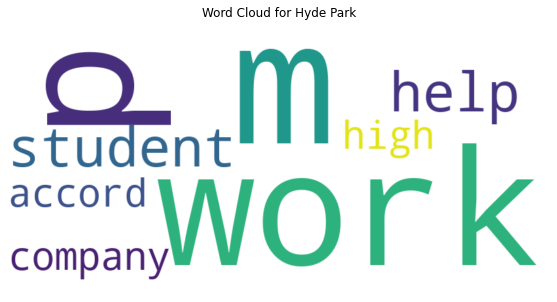

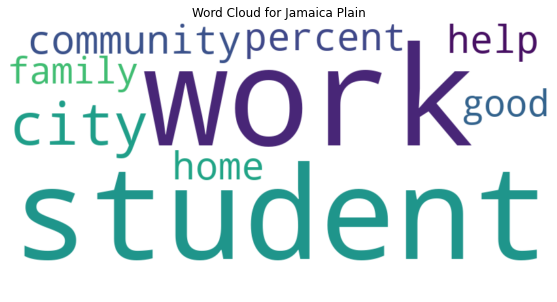

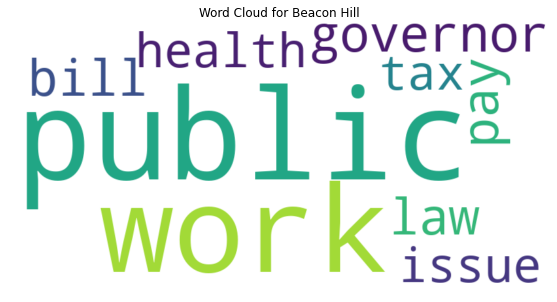

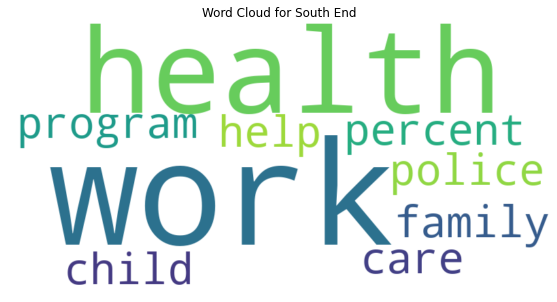

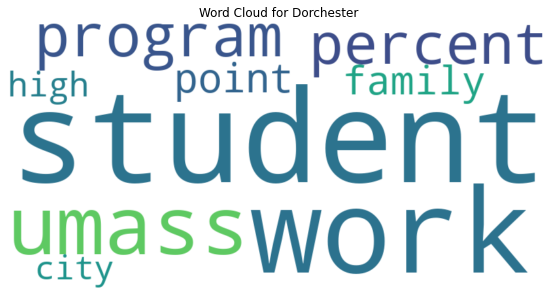

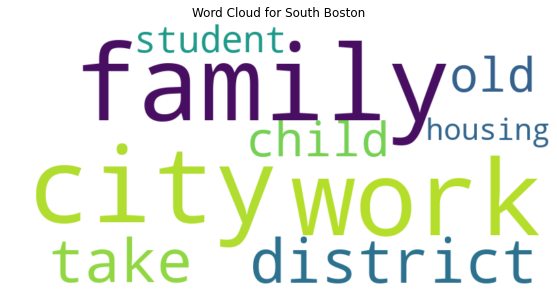

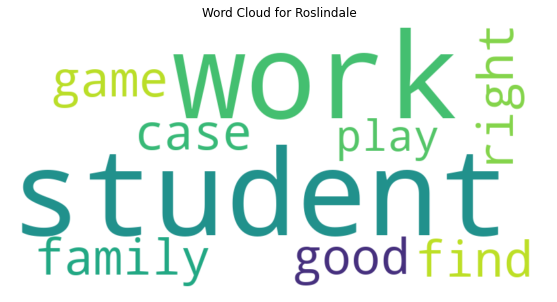

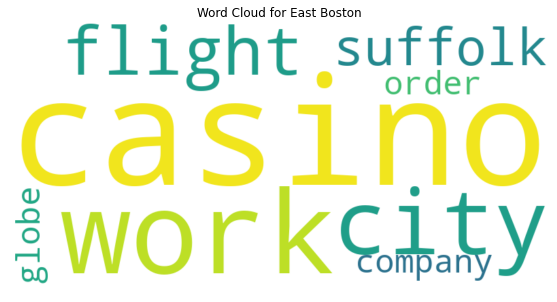

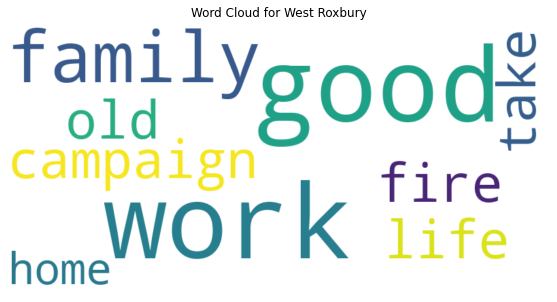

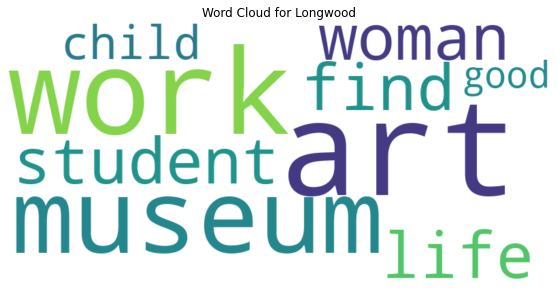

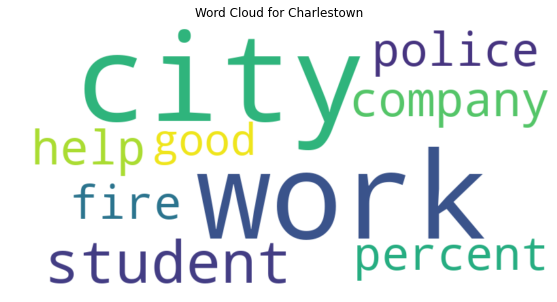

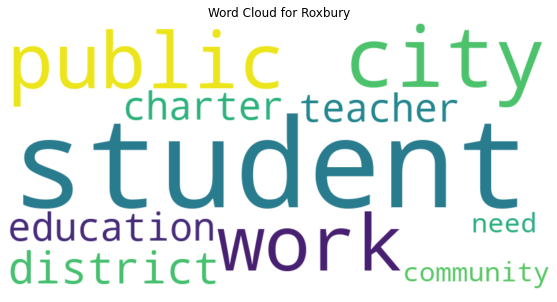

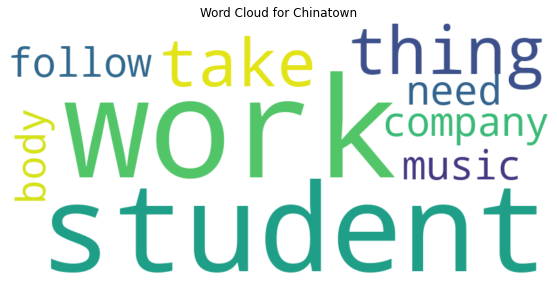

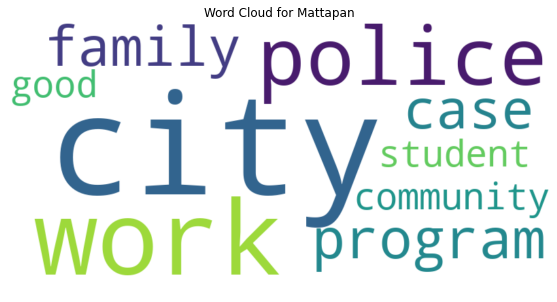

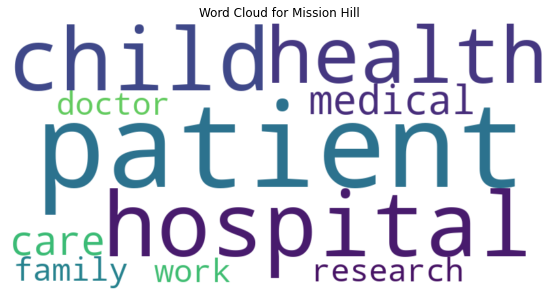

In [10]:
# Function to generate and display word cloud
def generate_word_cloud(keywords, neighborhood):
    if keywords:  # Only generate word cloud if there are keywords
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for {neighborhood}")
        plt.show()

# Generating word cloud for each neighborhood
for neighborhood in df2['Neighborhood'].unique():
    keywords = df2[df2['Neighborhood'] == neighborhood]['Keywords'].values
    if len(keywords) > 0 and keywords[0]:  # Check if there are any keywords
        generate_word_cloud(keywords[0], neighborhood)